In [16]:
from tensorflow import keras

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [17]:
X_train_full.shape

(60000, 28, 28)

In [18]:
X_train_full.dtype

dtype('uint8')

In [19]:
CV_SIZE = 5000
(X_cv, X_train) = (X_train_full[:CV_SIZE] / 255.0, X_train_full[CV_SIZE:] / 255.0)
(y_cv, y_train) = (y_train_full[:CV_SIZE], y_train_full[CV_SIZE:])

In [20]:
# Format goes: output = class_names[y_i]
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [70]:
import numpy as np
import tensorflow as tf

from keras.losses import SparseCategoricalCrossentropy

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # preprocessing layer
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dense(75, activation="relu"),
    keras.layers.Dense(10, activation="linear")
])

optimizer = tf.optimizers.Adam();
model.compile(optimizer=optimizer, loss=SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])

In [71]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_cv, y_cv))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4909 - accuracy: 0.8236 - val_loss: 0.4010 - val_accuracy: 0.8550
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3684 - accuracy: 0.8655 - val_loss: 0.3729 - val_accuracy: 0.8636
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3301 - accuracy: 0.8781 - val_loss: 0.3210 - val_accuracy: 0.8872
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3064 - accuracy: 0.8862 - val_loss: 0.3288 - val_accuracy: 0.8794
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2896 - accuracy: 0.8917 - val_loss: 0.3143 - val_accuracy: 0.8878
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2738 - accuracy: 0.8977 - val_loss: 0.2924 - val_accuracy: 0.8956
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2618 - accuracy: 0.9021 - val_loss: 0.3122 - val_accuracy:

In [75]:
def predict(num_preds, X, y, model): # predicts random entries of X
    size = len(X)
    predictions = []
    
    for i in range(num_preds):
        # pick a random (x, y) pairing
        index = int(np.random.rand() * size)
        x = X[index]
        y_actual = np.zeros((10, 1))
        y_actual[y[index]] = 1
        
        yhat = model.predict(x)
        
        print(f"yhat = {yhat}, y = {y_actual}")
        
        predictions.append((yhat, y_actual))
    
    return predictions

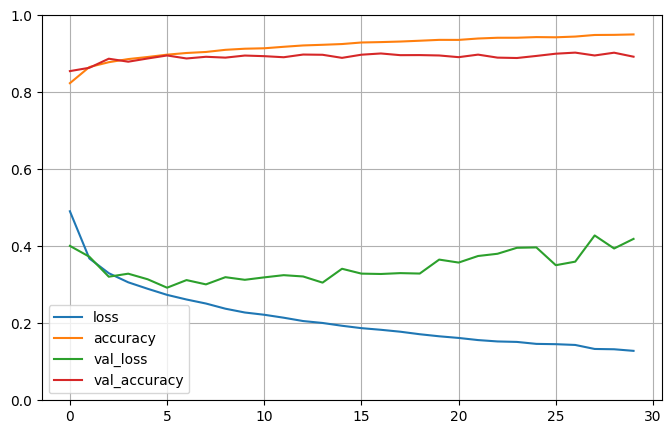

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

from pandas import DataFrame

DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # vertical range: [0, 1]
plt.show()

In [73]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dense_36 (Dense)            (None, 200)               157000    
                                                                 
 dense_37 (Dense)            (None, 75)                15075     
                                                                 
 dense_38 (Dense)            (None, 10)                760       
                                                                 
Total params: 172,835
Trainable params: 172,835
Non-trainable params: 0
_________________________________________________________________


In [81]:
predict(3, X_cv, y_cv, model)

1/1 [==============================] - 0s 11ms/step
yhat = [[-12.903791  -22.47496    -1.3053558  -9.391639    5.1379743 -15.135408
    8.726976  -25.829847  -15.309375  -22.110435 ]], y = [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]]
1/1 [==============================] - 0s 12ms/step
yhat = [[-33.157047 -30.327885 -27.730268 -30.711481 -20.59418   19.923824
  -27.49271  -15.708272 -20.347904 -16.104761]], y = [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]]
1/1 [==============================] - 0s 10ms/step
yhat = [[-24.847162  -16.061302  -12.85605   -12.114112  -18.29279     7.7793136
  -10.341816    1.5982894 -14.408424   -5.662129 ]], y = [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]]


[(array([[-12.903791 , -22.47496  ,  -1.3053558,  -9.391639 ,   5.1379743,
          -15.135408 ,   8.726976 , -25.829847 , -15.309375 , -22.110435 ]],
        dtype=float32),
  array([[0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [1.],
         [0.],
         [0.],
         [0.]])),
 (array([[-33.157047, -30.327885, -27.730268, -30.711481, -20.59418 ,
           19.923824, -27.49271 , -15.708272, -20.347904, -16.104761]],
        dtype=float32),
  array([[0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [1.],
         [0.],
         [0.],
         [0.],
         [0.]])),
 (array([[-24.847162 , -16.061302 , -12.85605  , -12.114112 , -18.29279  ,
            7.7793136, -10.341816 ,   1.5982894, -14.408424 ,  -5.662129 ]],
        dtype=float32),
  array([[0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [1.],
         [0.],
         [0.],
         [0.],
         [0.]]))]

In [138]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_all, X_test, y_train_all, y_test = train_test_split(housing.data, housing.target)
X_train, X_cv, y_train, y_cv = train_test_split(X_train_all, y_train_all)

scaler = StandardScaler()

X_train = tf.convert_to_tensor(scaler.fit_transform(X_train), dtype=tf.float64)
X_cv = tf.convert_to_tensor(scaler.fit_transform(X_cv), dtype=tf.float64)
X_test = tf.convert_to_tensor(scaler.fit_transform(X_test), dtype=tf.float64)

In [139]:
from keras import models, layers

housingModel = models.Sequential([
    layers.Dense(100, activation="relu"),
    layers.Dense(1)
])

In [140]:
from keras.losses import MeanSquaredError

housingModel.compile(optimizer="adam", loss=MeanSquaredError(), metrics=['accuracy'])

In [141]:
housingHistory = housingModel.fit(X_train, y_train, epochs=13, batch_size=32, validation_data=(X_cv, y_cv))

Epoch 1/13
363/363 [==============================] - 1s 923us/step - loss: 1.3629 - accuracy: 0.0031 - val_loss: 0.5866 - val_accuracy: 0.0018
Epoch 2/13
363/363 [==============================] - 0s 727us/step - loss: 0.4763 - accuracy: 0.0034 - val_loss: 0.4365 - val_accuracy: 0.0018
Epoch 3/13
363/363 [==============================] - 0s 735us/step - loss: 0.4079 - accuracy: 0.0033 - val_loss: 0.4098 - val_accuracy: 0.0018
Epoch 4/13
363/363 [==============================] - 0s 734us/step - loss: 0.3897 - accuracy: 0.0033 - val_loss: 0.4000 - val_accuracy: 0.0018
Epoch 5/13
363/363 [==============================] - 0s 730us/step - loss: 0.3909 - accuracy: 0.0034 - val_loss: 0.4180 - val_accuracy: 0.0018
Epoch 6/13
363/363 [==============================] - 0s 735us/step - loss: 0.3869 - accuracy: 0.0034 - val_loss: 0.3946 - val_accuracy: 0.0018
Epoch 7/13
363/363 [==============================] - 0s 727us/step - loss: 0.3863 - accuracy: 0.0034 - val_loss: 0.4084 - val_accuracy:

In [119]:
def plotHistory(history):
    DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1) # vertical range: [0, 1]
    plt.show()

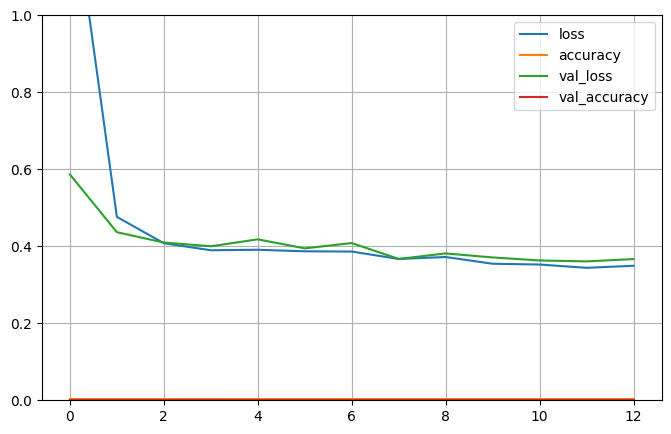

In [142]:
plotHistory(housingHistory);

In [165]:
input_layer = layers.Input(shape=X_train.shape[1:])
hl1 = layers.Dense(50, activation="relu")(input_layer)
hl2 = layers.Dense(30, activation="relu")(hl1)
concat = layers.concatenate([input_layer, hl1, hl2]) # inputs for the next layer
hL = layers.Dense(1)(concat)

awesome_housing_model = keras.Model(inputs=[input_layer], outputs =[hL])

In [166]:
awesome_housing_model.compile(loss=MeanSquaredError(), optimizer=tf.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

In [167]:
awesome_history = awesome_housing_model.fit(X_train, y_train, batch_size=128, epochs=25, validation_data=(X_cv, y_cv))

Epoch 1/25
91/91 [==============================] - 0s 2ms/step - loss: 2.1187 - accuracy: 0.0022 - val_loss: 0.8569 - val_accuracy: 0.0018
Epoch 2/25
91/91 [==============================] - 0s 978us/step - loss: 0.7331 - accuracy: 0.0034 - val_loss: 0.6731 - val_accuracy: 0.0018
Epoch 3/25
91/91 [==============================] - 0s 945us/step - loss: 0.5716 - accuracy: 0.0034 - val_loss: 0.5452 - val_accuracy: 0.0018
Epoch 4/25
91/91 [==============================] - 0s 967us/step - loss: 0.4795 - accuracy: 0.0033 - val_loss: 0.4737 - val_accuracy: 0.0018
Epoch 5/25
91/91 [==============================] - 0s 978us/step - loss: 0.4306 - accuracy: 0.0033 - val_loss: 0.4327 - val_accuracy: 0.0018
Epoch 6/25
91/91 [==============================] - 0s 978us/step - loss: 0.4043 - accuracy: 0.0033 - val_loss: 0.4094 - val_accuracy: 0.0018
Epoch 7/25
91/91 [==============================] - 0s 989us/step - loss: 0.3915 - accuracy: 0.0032 - val_loss: 0.4041 - val_accuracy: 0.0018
Epoch 8/

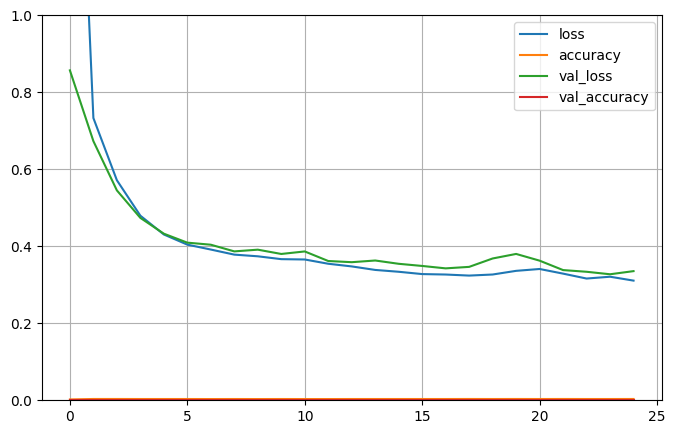

In [168]:
plotHistory(awesome_history)

In [175]:
awesome_housing_model.predict(X_cv[0:1])

1/1 [==============================] - 0s 14ms/step


array([[2.4703405]], dtype=float32)

In [177]:
print(y_cv[0])

3.045


In [229]:
def predictRandom(num_preds, X, y, model): # predicts random entries of X
    size = len(X)
    ys = []
    yhats = []
    
    for i in range(num_preds):
        # pick a random (x, y) pairing
        index = int(np.random.rand() * size)
        x = X[index:index+1]
        y_actual = y[index]
        
        yhat = float(model.predict(x))
        
        print(f"yhat = {yhat}, y = {y_actual}")
        
        ys.append(y_actual)
        yhats.append(yhat)
    
    return (np.array(ys), np.array(yhats))

In [230]:
preds = predictRandom(15, X_cv, y_cv, awesome_housing_model)

1/1 [==============================] - 0s 13ms/step
yhat = 0.7627212405204773, y = 0.806
1/1 [==============================] - 0s 11ms/step
yhat = 1.7503799200057983, y = 2.925
1/1 [==============================] - 0s 12ms/step
yhat = 2.5247583389282227, y = 3.294
1/1 [==============================] - 0s 11ms/step
yhat = 2.043790578842163, y = 1.565
1/1 [==============================] - 0s 12ms/step
yhat = 1.7966575622558594, y = 1.625
1/1 [==============================] - 0s 12ms/step
yhat = 1.9856568574905396, y = 2.207
1/1 [==============================] - 0s 11ms/step
yhat = 3.8068597316741943, y = 4.2
1/1 [==============================] - 0s 12ms/step
yhat = 1.5463531017303467, y = 0.929
1/1 [==============================] - 0s 13ms/step
yhat = 0.8756814002990723, y = 1.485
1/1 [==============================] - 0s 13ms/step
yhat = 3.486971139907837, y = 5.00001
1/1 [==============================] - 0s 12ms/step
yhat = 1.2102974653244019, y = 1.25
1/1 [===================

In [231]:
print(preds)

(array([0.806  , 2.925  , 3.294  , 1.565  , 1.625  , 2.207  , 4.2    ,
       0.929  , 1.485  , 5.00001, 1.25   , 3.964  , 0.695  , 2.319  ,
       2.801  ]), array([0.76272124, 1.75037992, 2.52475834, 2.04379058, 1.79665756,
       1.98565686, 3.80685973, 1.5463531 , 0.8756814 , 3.48697114,
       1.21029747, 3.73070455, 0.72060084, 2.83912587, 2.7422092 ]))


In [234]:
def mse(preds):
    y = preds[0]
    yhat = preds[1]
    
    m = len(y)
    
    diff = yhat - y
    return np.dot(diff, diff) / m

In [235]:
mse(preds)

0.3871948836980706

In [240]:
def average_mse(pred_bucket_size, X, y, model, iterations):
    total = 0
    for i in range(iterations):
        total += mse(predictRandom(pred_bucket_size, X, y, model))
    
    return total / iterations

In [244]:
avg_err = average_mse(50, X_cv, y_cv, awesome_housing_model, iterations=10)

1/1 [==============================] - 0s 13ms/step
yhat = 1.6696460247039795, y = 1.142
1/1 [==============================] - 0s 12ms/step
yhat = 1.989783525466919, y = 1.25
1/1 [==============================] - 0s 11ms/step
yhat = 1.3839225769042969, y = 1.388
1/1 [==============================] - 0s 12ms/step
yhat = 1.642194390296936, y = 1.651
1/1 [==============================] - 0s 12ms/step
yhat = 0.946641206741333, y = 1.375
1/1 [==============================] - 0s 11ms/step
yhat = 1.09731924533844, y = 1.347
1/1 [==============================] - 0s 12ms/step
yhat = 1.5200949907302856, y = 1.538
1/1 [==============================] - 0s 11ms/step
yhat = 2.664811372756958, y = 2.616
1/1 [==============================] - 0s 11ms/step
yhat = 2.496159315109253, y = 3.147
1/1 [==============================] - 0s 12ms/step
yhat = 1.313875436782837, y = 0.998
1/1 [==============================] - 0s 12ms/step
yhat = 1.9619381427764893, y = 1.302
1/1 [=========================

1/1 [==============================] - 0s 11ms/step
yhat = 2.3739423751831055, y = 2.616
1/1 [==============================] - 0s 12ms/step
yhat = 2.3739423751831055, y = 2.616
1/1 [==============================] - 0s 12ms/step
yhat = 3.4563753604888916, y = 3.769
1/1 [==============================] - 0s 12ms/step
yhat = 1.6661906242370605, y = 1.465
1/1 [==============================] - 0s 12ms/step
yhat = 0.8481372594833374, y = 0.946
1/1 [==============================] - 0s 11ms/step
yhat = 1.1036182641983032, y = 0.904
1/1 [==============================] - 0s 11ms/step
yhat = 1.2333242893218994, y = 0.985
1/1 [==============================] - 0s 12ms/step
yhat = 3.501873254776001, y = 3.427
1/1 [==============================] - 0s 13ms/step
yhat = 1.8593839406967163, y = 1.561
1/1 [==============================] - 0s 12ms/step
yhat = 1.410166621208191, y = 1.428
1/1 [==============================] - 0s 12ms/step
yhat = 1.4254496097564697, y = 0.928
1/1 [==================

1/1 [==============================] - 0s 12ms/step
yhat = 1.4885506629943848, y = 1.896
1/1 [==============================] - 0s 12ms/step
yhat = 4.332130432128906, y = 3.997
1/1 [==============================] - 0s 12ms/step
yhat = 1.6297566890716553, y = 1.578
1/1 [==============================] - 0s 12ms/step
yhat = 1.4259079694747925, y = 1.028
1/1 [==============================] - 0s 11ms/step
yhat = 1.4875125885009766, y = 2.581
1/1 [==============================] - 0s 12ms/step
yhat = 1.6359533071517944, y = 1.43
1/1 [==============================] - 0s 12ms/step
yhat = 1.0691386461257935, y = 0.875
1/1 [==============================] - 0s 12ms/step
yhat = 3.032374382019043, y = 2.724
1/1 [==============================] - 0s 12ms/step
yhat = 3.782944679260254, y = 2.751
1/1 [==============================] - 0s 12ms/step
yhat = 1.8110418319702148, y = 1.625
1/1 [==============================] - 0s 13ms/step
yhat = 3.2081239223480225, y = 3.365
1/1 [====================

1/1 [==============================] - 0s 12ms/step
yhat = 0.5755707621574402, y = 0.606
1/1 [==============================] - 0s 12ms/step
yhat = 1.6660943031311035, y = 1.748
1/1 [==============================] - 0s 12ms/step
yhat = 1.653268814086914, y = 2.38
1/1 [==============================] - 0s 15ms/step
yhat = 2.6969573497772217, y = 2.594
1/1 [==============================] - 0s 12ms/step
yhat = 1.138044834136963, y = 1.261
1/1 [==============================] - 0s 11ms/step
yhat = 1.5444663763046265, y = 1.479
1/1 [==============================] - 0s 11ms/step
yhat = 1.400061845779419, y = 1.375
1/1 [==============================] - 0s 12ms/step
yhat = 3.5638277530670166, y = 2.985
1/1 [==============================] - 0s 11ms/step
yhat = 3.2843055725097656, y = 2.945
1/1 [==============================] - 0s 12ms/step
yhat = 1.5938224792480469, y = 2.492
1/1 [==============================] - 0s 11ms/step
yhat = 2.060791254043579, y = 1.833
1/1 [=====================

yhat = 1.2836114168167114, y = 0.825
1/1 [==============================] - 0s 11ms/step
yhat = 2.787973403930664, y = 2.464
1/1 [==============================] - 0s 11ms/step
yhat = 1.3673866987228394, y = 1.104
1/1 [==============================] - 0s 11ms/step
yhat = 1.5449845790863037, y = 0.379
1/1 [==============================] - 0s 12ms/step
yhat = 1.2084999084472656, y = 1.444
1/1 [==============================] - 0s 11ms/step
yhat = 1.6200019121170044, y = 1.104
1/1 [==============================] - 0s 12ms/step
yhat = 1.1320972442626953, y = 0.968
1/1 [==============================] - 0s 12ms/step
yhat = 2.6388092041015625, y = 3.455
1/1 [==============================] - 0s 12ms/step
yhat = 1.1662157773971558, y = 1.525
1/1 [==============================] - 0s 11ms/step
yhat = 3.1609396934509277, y = 4.108
1/1 [==============================] - 0s 11ms/step
yhat = 1.2245585918426514, y = 1.207
1/1 [==============================] - 0s 11ms/step
yhat = 1.8620826005935

1/1 [==============================] - 0s 16ms/step
yhat = 1.9685577154159546, y = 2.85
1/1 [==============================] - 0s 14ms/step
yhat = 3.0241472721099854, y = 4.037
1/1 [==============================] - 0s 12ms/step
yhat = 2.0052552223205566, y = 1.932
1/1 [==============================] - 0s 19ms/step
yhat = 1.3623871803283691, y = 0.932
1/1 [==============================] - 0s 13ms/step
yhat = 1.8155428171157837, y = 2.221
1/1 [==============================] - 0s 12ms/step
yhat = 1.0507210493087769, y = 1.241
1/1 [==============================] - 0s 13ms/step
yhat = 2.4942615032196045, y = 4.045
1/1 [==============================] - 0s 12ms/step
yhat = 0.629041850566864, y = 0.679
1/1 [==============================] - 0s 13ms/step
yhat = 2.1581199169158936, y = 2.132
1/1 [==============================] - 0s 13ms/step
yhat = 0.6830059885978699, y = 0.523
1/1 [==============================] - 0s 14ms/step
yhat = 2.7409770488739014, y = 2.188
1/1 [==================

In [246]:
print(avg_err)

0.3570839429120672


In [402]:
from keras.layers import Input, Dense

n = X_train.shape[1]
delayed = 3

input_A = Input(shape=[delayed], name="delayed_input")
input_B = Input(shape=[n - delayed], name="standard_input")

hl1 = Dense(35, activation=tf.keras.layers.LeakyReLU(alpha=0.3))(input_B)
hl2 = Dense(30, activation="swish")(hl1)
concat = layers.concatenate([hl1, hl2, input_A, input_B])
hl3 = Dense(20, activation="relu")(concat)
L_out = Dense(1, activation="linear")(layers.concatenate([input_A, input_B, hl1, hl2, hl3]))

super_awesome_housing_model = keras.Model(inputs=(input_A, input_B), outputs=[L_out])

In [413]:
super_awesome_housing_model.compile(loss=MeanSquaredError(), optimizer=tf.optimizers.Adam(learning_rate=0.002))

In [414]:
(X_train_A, X_train_B) = (X_train[:, :delayed], X_train[:, delayed:])
(X_cv_A, X_cv_B) = (X_cv[:, :delayed], X_cv[:, delayed:])
(X_test_A, X_test_B) = (X_test[:, :delayed], X_test[:, delayed:])

In [415]:
X_train_AB = (X_train_A, X_train_B)
X_cv_AB = (X_cv_A, X_cv_B)

In [416]:
superCoolHistory = super_awesome_housing_model.fit(X_train_AB, y_train, epochs=25, validation_data=(X_cv_AB, y_cv))

Epoch 1/25
363/363 [==============================] - 1s 1ms/step - loss: 0.2768 - val_loss: 0.3013
Epoch 2/25
363/363 [==============================] - 0s 818us/step - loss: 0.2788 - val_loss: 0.2975
Epoch 3/25
363/363 [==============================] - 0s 821us/step - loss: 0.2723 - val_loss: 0.3633
Epoch 4/25
363/363 [==============================] - 0s 818us/step - loss: 0.3022 - val_loss: 0.3100
Epoch 5/25
363/363 [==============================] - 0s 818us/step - loss: 0.2913 - val_loss: 0.3067
Epoch 6/25
363/363 [==============================] - 0s 822us/step - loss: 0.2792 - val_loss: 0.2987
Epoch 7/25
363/363 [==============================] - 0s 832us/step - loss: 0.2733 - val_loss: 0.3395
Epoch 8/25
363/363 [==============================] - 0s 826us/step - loss: 0.2709 - val_loss: 0.2985
Epoch 9/25
363/363 [==============================] - 0s 824us/step - loss: 0.2710 - val_loss: 0.2992
Epoch 10/25
363/363 [==============================] - 0s 851us/step - loss: 0.2669 

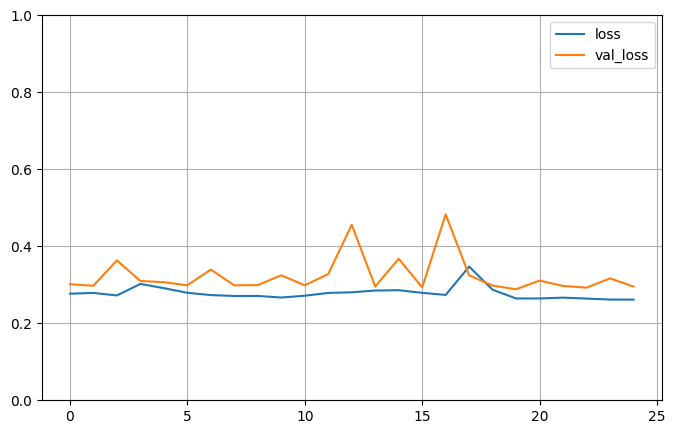

In [417]:
plotHistory(superCoolHistory)

In [418]:
print(y_train)

[2.07  0.682 1.625 ... 4.548 2.908 1.588]


In [421]:
print(y_cv)

[3.045   1.609   2.67    ... 2.355   5.00001 0.981  ]


In [423]:
super_awesome_housing_model.evaluate((X_test_A, X_test_B), y_test)

162/162 [==============================] - 0s 534us/step - loss: 0.3690


0.3689859211444855

In [426]:
class SubclassModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hl1 = Dense(units, activation=activation)
        self.hl2 = Dense(units, activation=activation)
        self.main_output = Dense(1)
        self.other_output = Dense(1)
    
    # this call() method makes the subclass api different from the functional and Sequential APIs because you aren't creating the inputs at the same time
    # this creates a mathematical generalization where the only limit is creativity
    # you can do ANYTHING you want! for loops, if statements, etc.
    def call(self, inputs):
        (inputA, inputB) = inputs
        hl1 = self.hl1(inputA)
        hl2 = self.hl2(hl1)
        L_out = self.main_output(layers.concatenate([inputB, hl1, hl2]))
        L_out_other = self.other_output(inputB)
        
        return (L_out, L_out_other)

In [428]:
# Saving and loading a Model (only works with Sequential and Functional API, not Subclass API)
# model.save("my_keras_model.h5")
# model = keras.models.load_model("my_keras_model.h5")

# Saving and loading Parameters (works for all)
# model.save_weights()
# model.load_weights()

In [433]:
# Callbacks: called at the start and end of every epoch
checkpoint_callback = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
early_stopping_callback = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
hist = super_awesome_housing_model.fit(X_train_AB, y_train, epochs=25, validation_data=(X_cv_AB, y_cv), callbacks=[checkpoint_callback, early_stopping_callback])

Epoch 1/25
363/363 [==============================] - 0s 975us/step - loss: 0.2455 - val_loss: 0.3124
Epoch 2/25
363/363 [==============================] - 0s 901us/step - loss: 0.2453 - val_loss: 0.2822
Epoch 3/25
363/363 [==============================] - 0s 942us/step - loss: 0.2432 - val_loss: 0.3020
Epoch 4/25
363/363 [==============================] - 0s 951us/step - loss: 0.2440 - val_loss: 0.3062
Epoch 5/25
363/363 [==============================] - 0s 912us/step - loss: 0.2420 - val_loss: 0.2889
Epoch 6/25
363/363 [==============================] - 0s 904us/step - loss: 0.2431 - val_loss: 0.3007
Epoch 7/25
363/363 [==============================] - 0s 916us/step - loss: 0.2422 - val_loss: 0.3109
Epoch 8/25
363/363 [==============================] - 0s 920us/step - loss: 0.2478 - val_loss: 0.2959
Epoch 9/25
363/363 [==============================] - 0s 939us/step - loss: 0.2514 - val_loss: 0.2889
Epoch 10/25
363/363 [==============================] - 0s 931us/step - loss: 0.242

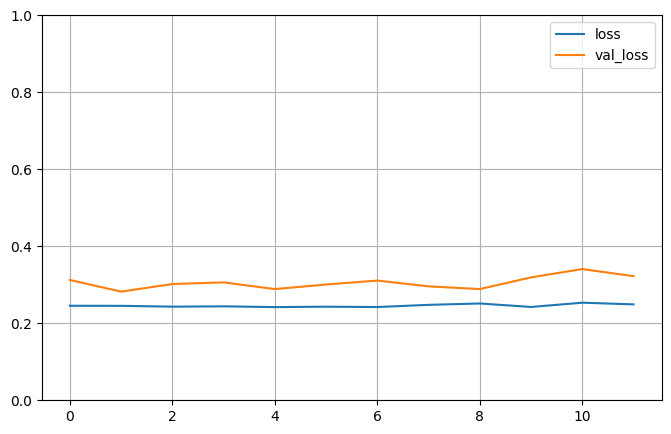

In [434]:
plotHistory(hist)

In [435]:
import os

root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [436]:
# Callbacks: called at the start and end of every epoch
checkpoint_callback = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
early_stopping_callback = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
tensorboard_callback = keras.callbacks.TensorBoard(run_logdir)
hist = super_awesome_housing_model.fit(X_train_AB, y_train, epochs=25, validation_data=(X_cv_AB, y_cv), callbacks=[checkpoint_callback, early_stopping_callback, tensorboard_callback])

Epoch 1/25
363/363 [==============================] - 0s 1ms/step - loss: 0.2450 - val_loss: 0.3108
Epoch 2/25
363/363 [==============================] - 0s 911us/step - loss: 0.2454 - val_loss: 0.2835
Epoch 3/25
363/363 [==============================] - 0s 920us/step - loss: 0.2483 - val_loss: 0.3074
Epoch 4/25
363/363 [==============================] - 0s 1000us/step - loss: 0.2482 - val_loss: 0.3440
Epoch 5/25
363/363 [==============================] - 0s 898us/step - loss: 0.2621 - val_loss: 0.3003
Epoch 6/25
363/363 [==============================] - 0s 906us/step - loss: 0.2558 - val_loss: 0.2918
Epoch 7/25
363/363 [==============================] - 0s 938us/step - loss: 0.2478 - val_loss: 0.2872
Epoch 8/25
363/363 [==============================] - 0s 906us/step - loss: 0.2428 - val_loss: 0.2899
Epoch 9/25
363/363 [==============================] - 0s 923us/step - loss: 0.2415 - val_loss: 0.2932
Epoch 10/25
363/363 [==============================] - 0s 920us/step - loss: 0.2410

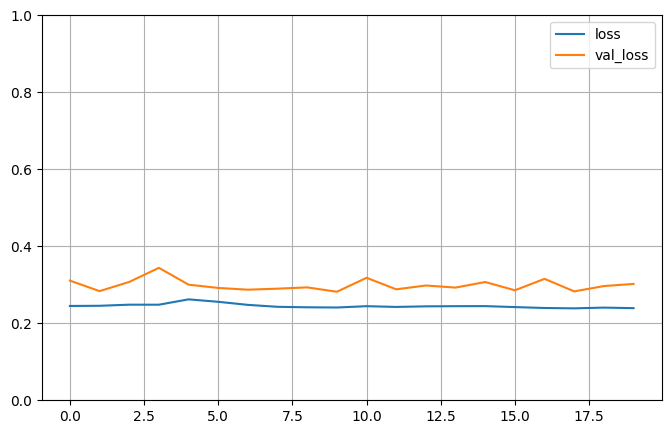

In [437]:
plotHistory(hist)

In [494]:
class CustomModel(keras.Model):
    def __init__(self, hidden_layers=[], output_layers=[], **kwargs):
        super().__init__(**kwargs)
        
        def compose(args):
            return Dense(units=args[0], activation=args[1])
        
        self.hidden_layers_start = [
            compose(hidden_layers[0]),
            compose(hidden_layers[0]),
            compose(hidden_layers[0])
        ]
        self.hidden_layers_rest = [
            compose(hidden_layers[1]),
            compose(hidden_layers[2]),
            compose(hidden_layers[3])
        ]
        
        self.output_layers = [compose(output_layers[0])]
    
    
    def call(self, inputs):
        (inputA, inputB) = inputs
        
        hl1_A = self.hidden_layers_start[0](inputA)
        hl1_B = self.hidden_layers_start[1](inputB)
        hl1_AB = self.hidden_layers_start[2](layers.concatenate([inputA, inputB]))
        
        hl2 = self.hidden_layers_rest[0](layers.concatenate([hl1_A, hl1_B, hl1_AB]))
        hl3 = self.hidden_layers_rest[1](hl2)
        hl4 = self.hidden_layers_rest[2](layers.concatenate([hl1_AB, hl3]))
        
        L_out = self.output_layers[0](hl4)
        
        return L_out

Epoch 1/100
182/182 [==============================] - 1s 2ms/step - loss: 0.7651 - val_loss: 0.4524
Epoch 2/100
182/182 [==============================] - 0s 1ms/step - loss: 0.3883 - val_loss: 0.3927
Epoch 3/100
182/182 [==============================] - 0s 1ms/step - loss: 0.4245 - val_loss: 0.3719
Epoch 4/100
182/182 [==============================] - 0s 1ms/step - loss: 0.3444 - val_loss: 0.3925
Epoch 5/100
182/182 [==============================] - 0s 1ms/step - loss: 0.3264 - val_loss: 0.3407
Epoch 6/100
182/182 [==============================] - 0s 1ms/step - loss: 0.3160 - val_loss: 0.3374
Epoch 7/100
182/182 [==============================] - 0s 1ms/step - loss: 0.3246 - val_loss: 0.3449
Epoch 8/100
182/182 [==============================] - 0s 1ms/step - loss: 0.3441 - val_loss: 0.3138
Epoch 9/100
182/182 [==============================] - 0s 1ms/step - loss: 0.3046 - val_loss: 0.3322
Epoch 10/100
182/182 [==============================] - 0s 1ms/step - loss: 0.2956 - val_lo

182/182 [==============================] - 0s 1ms/step - loss: 0.2052 - val_loss: 0.2843
Epoch 82/100
182/182 [==============================] - 0s 1ms/step - loss: 0.2090 - val_loss: 0.2867
Epoch 83/100
182/182 [==============================] - 0s 1ms/step - loss: 0.2068 - val_loss: 0.3086
Epoch 84/100
182/182 [==============================] - 0s 1ms/step - loss: 0.2044 - val_loss: 0.3087
Epoch 85/100
182/182 [==============================] - 0s 1ms/step - loss: 0.2064 - val_loss: 0.3118
Epoch 86/100
182/182 [==============================] - 0s 1ms/step - loss: 0.2060 - val_loss: 0.2962
Epoch 87/100
182/182 [==============================] - 0s 1ms/step - loss: 0.2053 - val_loss: 0.2902
Epoch 88/100
182/182 [==============================] - 0s 1ms/step - loss: 0.2043 - val_loss: 0.3105
Epoch 89/100
182/182 [==============================] - 0s 1ms/step - loss: 0.2049 - val_loss: 0.3113
Epoch 90/100
182/182 [==============================] - 0s 1ms/step - loss: 0.2015 - val_loss: 

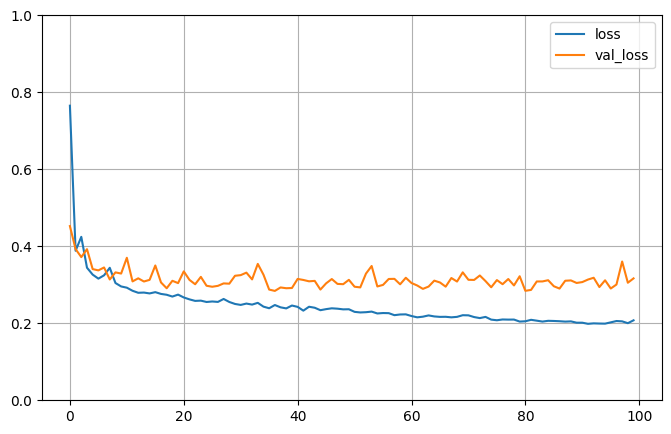

In [534]:
custom_ann = CustomModel(hidden_layers=[
    (50, "swish"),
    (30, "relu"),
    (15, "relu"),
    (8, "relu")
], output_layers=[(1, "linear")])

custom_ann.compile(loss=MeanSquaredError(), optimizer=tf.optimizers.Adam(learning_rate=0.005))

custom_history = custom_ann.fit((X_train_A, X_train_B), y_train,
                                validation_data=((X_cv_A, X_cv_B), y_cv),
                                epochs=100, batch_size=64, callbacks=[tensorboard_callback])

plotHistory(custom_history)

In [533]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [535]:
%reload_ext tensorboard

In [536]:
import sklearn

kerasRegressor = keras.wrappers.scikit_learn.KerasRegressor(custom_ann)

C:\Users\night\AppData\Local\Temp\ipykernel_41460\472527929.py:3: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  kerasRegressor = keras.wrappers.scikit_learn.KerasRegressor(custom_ann)
